### A1, A2, A3: Regression Analysis Results ###

--- Metrics for SIMPLE feature model (using 'Cz..__alpha') ---
Training Set Metrics:
  MSE: 0.0000
  RMSE: 0.0000
  MAPE (%): 118.2902
  R2 Score: 0.7343

Test Set Metrics:
  MSE: 0.0000
  RMSE: 0.0000
  MAPE (%): 116.2607
  R2 Score: 0.7262


--- Metrics for MULTIPLE feature model (all attributes) ---
Training Set Metrics:
  MSE: 0.0000
  RMSE: 0.0000
  MAPE (%): 76.6149
  R2 Score: 0.9090

Test Set Metrics:
  MSE: 0.0000
  RMSE: 0.0000
  MAPE (%): 75.2462
  R2 Score: 0.9274

### A4, A5, A6, A7: Clustering Analysis Results ###

--- Clustering Evaluation Metrics for k=2 (A5) ---
  Silhouette Score: 0.6134
  Calinski-Harabasz Score: 113914.7769
  Davies-Bouldin Score: 0.5192


--- Finding Optimal K (A6, A7) ---
Clustering analysis plots saved to 'optimal_k_plots.png'


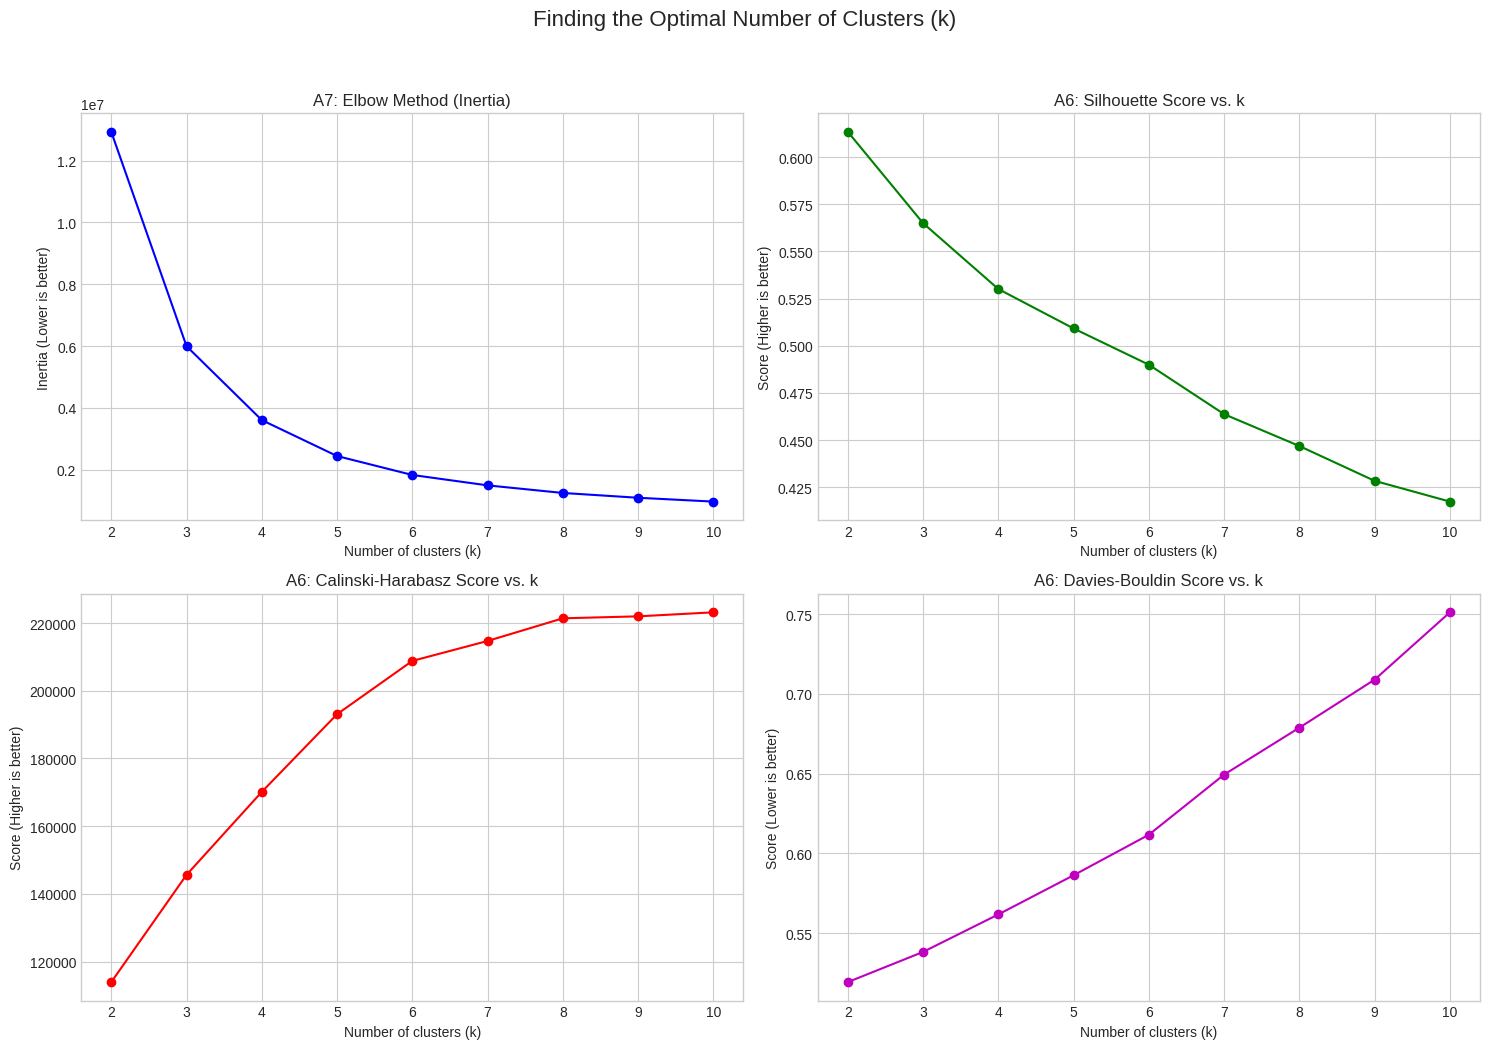

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_prepare_data(file_path):


    df = pd.read_csv(r"/content/features_filtered.csv") # Load the dataset


    numerical_df = df.select_dtypes(include=[np.number])  # Select only numerical columns for regression and clustering

    return numerical_df


# A1, A2, A3

def train_simple_linear_regression(X_train_single_feature, y_train_actual):
    """
    Trains a simple linear regression model on a single feature.
    (Assignment A1)
    """

    X_train_reshaped = X_train_single_feature.values.reshape(-1, 1)  # Reshape the data because scikit-learn expects a 2D array


    reg_model = LinearRegression().fit(X_train_reshaped, y_train_actual)
    return reg_model

def train_multiple_linear_regression(X_train_multi_feature, y_train_actual):
    """
    Trains a multiple linear regression model using all available features.
    (Assignment A3)
    """
    multi_reg_model = LinearRegression().fit(X_train_multi_feature, y_train_actual)
    return multi_reg_model

def calculate_regression_metrics(model, X_data, y_true):
    """
    Calculates MSE, RMSE, MAPE, and R2 scores for a regression model.
    (Assignment A2)
    """

    if len(X_data.shape) == 1:       # Ensure X_data is a 2D array for prediction
        X_data = X_data.values.reshape(-1, 1)


    y_pred = model.predict(X_data)


    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    metrics = {
        'MSE': mse,
        'RMSE': rmse,
        'MAPE (%)': mape,
        'R2 Score': r2
    }
    return metrics


# A4, A5, A6, A7: Clustering Functions


def perform_kmeans_clustering(X_data, k_clusters):
    """
    Performs k-means clustering on the provided data.
    (Assignment A4)
    """

    kmeans = KMeans(n_clusters=k_clusters, random_state=42, n_init=10).fit(X_data)  # Setting n_init explicitly to 10 to avoid FutureWarning and ensure stability
    return kmeans

def evaluate_clustering_performance(X_data, labels):
    """
    Calculates Silhouette, Calinski-Harabasz, and Davies-Bouldin scores.
    (Assignment A5)
    """
    scores = {
        'Silhouette Score': silhouette_score(X_data, labels),
        'Calinski-Harabasz Score': calinski_harabasz_score(X_data, labels),
        'Davies-Bouldin Score': davies_bouldin_score(X_data, labels)
    }
    return scores

def find_optimal_k_and_plot(X_data, max_k=11):
    """
    Calculates clustering metrics for k from 2 to max_k.
    Plots the Elbow Method graph (A7) and the evaluation score graphs (A6).
    """
    distortions = []
    silhouette_scores = []
    ch_scores = []
    db_scores = []
    k_values = range(2, max_k)

    for k in k_values:
        kmeans_model = perform_kmeans_clustering(X_data, k_clusters=k)


        distortions.append(kmeans_model.inertia_)  # For elbow method (A7)


        labels = kmeans_model.labels_    # For metric evaluation (A6)
        silhouette_scores.append(silhouette_score(X_data, labels))
        ch_scores.append(calinski_harabasz_score(X_data, labels))
        db_scores.append(davies_bouldin_score(X_data, labels))


    plt.style.use('seaborn-v0_8-whitegrid')   # Plotting the results
    fig, axes = plt.subplots(2, 2, figsize=(15, 11))
    fig.suptitle('Finding the Optimal Number of Clusters (k)', fontsize=16)


    axes[0, 0].plot(k_values, distortions, 'bo-')  # 1. Elbow Method Plot
    axes[0, 0].set_title('A7: Elbow Method (Inertia)')
    axes[0, 0].set_xlabel('Number of clusters (k)')
    axes[0, 0].set_ylabel('Inertia (Lower is better)')


    axes[0, 1].plot(k_values, silhouette_scores, 'go-')     # 2. Silhouette Score Plot
    axes[0, 1].set_title('A6: Silhouette Score vs. k')
    axes[0, 1].set_xlabel('Number of clusters (k)')
    axes[0, 1].set_ylabel('Score (Higher is better)')


    axes[1, 0].plot(k_values, ch_scores, 'ro-')  # 3. Calinski-Harabasz Score Plot
    axes[1, 0].set_title('A6: Calinski-Harabasz Score vs. k')
    axes[1, 0].set_xlabel('Number of clusters (k)')
    axes[1, 0].set_ylabel('Score (Higher is better)')


    axes[1, 1].plot(k_values, db_scores, 'mo-')  # 4. Davies-Bouldin Score Plot
    axes[1, 1].set_title('A6: Davies-Bouldin Score vs. k')
    axes[1, 1].set_xlabel('Number of clusters (k)')
    axes[1, 1].set_ylabel('Score (Lower is better)')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig('optimal_k_plots.png')
    print("Clustering analysis plots saved to 'optimal_k_plots.png'")



if __name__ == '__main__':

    file_path = r"/content/features_filtered.csv"
    numerical_data = load_and_prepare_data(file_path)



    y_reg = numerical_data['Pz..__alpha']    # --- Regression Analysis ---
    X_reg = numerical_data.drop('Pz..__alpha', axis=1)


    X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
        X_reg, y_reg, test_size=0.2, random_state=42
    )   # Split data for regression models

    print("### A1, A2, A3: Regression Analysis Results ###")


    # Simple Linear Regression (A1, A2)
    # We'll use 'Cz..__alpha' to predict 'Pz..__alpha'.
    X_train_simple = X_reg_train['Cz..__alpha']
    X_test_simple = X_reg_test['Cz..__alpha']

    simple_model = train_simple_linear_regression(X_train_simple, y_reg_train)

    print("\n--- Metrics for SIMPLE feature model (using 'Cz..__alpha') ---")
    train_metrics_simple = calculate_regression_metrics(simple_model, X_train_simple, y_reg_train)
    test_metrics_simple = calculate_regression_metrics(simple_model, X_test_simple, y_reg_test)

    print("Training Set Metrics:")
    for key, value in train_metrics_simple.items():
        print(f"  {key}: {value:.4f}")

    print("\nTest Set Metrics:")
    for key, value in test_metrics_simple.items():
        print(f"  {key}: {value:.4f}")

    # Multiple Linear Regression (A3)
    multi_model = train_multiple_linear_regression(X_reg_train, y_reg_train)

    print("\n\n--- Metrics for MULTIPLE feature model (all attributes) ---")
    train_metrics_multi = calculate_regression_metrics(multi_model, X_reg_train, y_reg_train)
    test_metrics_multi = calculate_regression_metrics(multi_model, X_reg_test, y_reg_test)

    print("Training Set Metrics:")
    for key, value in train_metrics_multi.items():
        print(f"  {key}: {value:.4f}")

    print("\nTest Set Metrics:")
    for key, value in test_metrics_multi.items():
        print(f"  {key}: {value:.4f}")

    # --- Clustering Analysis ---
    print("\n" + "=" * 50)
    print("### A4, A5, A6, A7: Clustering Analysis Results ###")
    print("=" * 50)

    # We use all numerical data for clustering to find its inherent structure.
    X_cluster = numerical_data.copy()

    # A4 & A5: K-Means with k=2
    k_demo = 2
    kmeans_demo = perform_kmeans_clustering(X_cluster, k_clusters=k_demo)

    print(f"\n--- Clustering Evaluation Metrics for k={k_demo} (A5) ---")
    cluster_scores = evaluate_clustering_performance(X_cluster, kmeans_demo.labels_)
    for key, value in cluster_scores.items():
        print(f"  {key}: {value:.4f}")

    # A6 & A7: Find and plot optimal K
    print("\n\n--- Finding Optimal K (A6, A7) ---")
    find_optimal_k_and_plot(X_cluster)